### Classification model evaluation metric

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd


In [2]:
heart_disease=pd.read_csv('../zero-to-mastery-ml/data/heart-disease.csv')
X=heart_disease.iloc[:,:-1]
Y=heart_disease.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)

##### Cross validation   
**Accuracy Score**

In [3]:
cross_val_score(clf,X,Y,cv=5)

array([0.85245902, 0.8852459 , 0.81967213, 0.86666667, 0.76666667])

In [4]:
cross_val_score(clf,X,Y,cv=5).mean(),clf.score(x_test,y_test)

(0.8116939890710382, 0.819672131147541)

### Area under Receiver \operating Charecteristic Curve(AUC/ROC)

ROC curves are comparision of models True Positive rate(TPR) and False Positive rate(FPR)

In [5]:
from sklearn.metrics import roc_curve
#Make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:5]

array([[0.22, 0.78],
       [0.88, 0.12],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.05, 0.95]])

In [6]:
y_probs_positive=y_probs[:,-1]

In [7]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [8]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06666667, 0.06666667, 0.1       , 0.1       , 0.13333333,
        0.13333333, 0.16666667, 0.16666667, 0.23333333, 0.26666667,
        0.26666667, 0.33333333, 0.36666667, 0.43333333, 0.46666667,
        0.46666667, 0.56666667, 0.66666667, 0.73333333, 0.8       ,
        0.83333333, 0.96666667, 1.        ]),
 array([0.        , 0.06451613, 0.09677419, 0.19354839, 0.25806452,
        0.32258065, 0.41935484, 0.48387097, 0.5483871 , 0.61290323,
        0.67741935, 0.70967742, 0.70967742, 0.74193548, 0.80645161,
        0.83870968, 0.83870968, 0.90322581, 0.90322581, 0.90322581,
        0.93548387, 0.93548387, 0.93548387, 0.93548387, 0.93548387,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([1.97, 0.97, 0.96, 0.95, 0.9 , 0.88, 0.83, 0.82, 0.79, 0.78, 0.7 ,
        0.68, 0.66

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc(fpr,tpr):
    '''
    Plots a ROC curve given the False positive rate(fpr) 
    and tru positive rate (tpr) of amodel
    '''
    plt.plot(fpr,tpr,color='orange',label='roc')
    plt.plot([0,1],[0,1],color='blue',label='guessing',linestyle='--')
    plt.title('REceiver Operating Charecteristic curve(ROC)')
    plt.xlabel('True Positive Rate(tpr)')
    plt.ylabel('False Positive Rate(fpr)')
    plt.legend()
    plt.show()

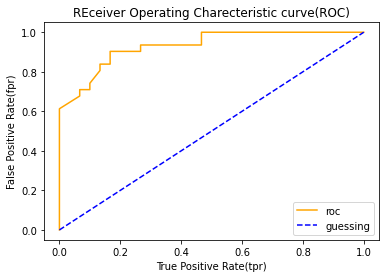

In [10]:
plot_roc(fpr,tpr)

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9311827956989247

##### Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(x_test))

array([[22,  8],
       [ 3, 28]], dtype=int64)

In [13]:
pd.crosstab(y_test,
           clf.predict(x_test),
           colnames=['Predicted Lables'],
            rownames=['Actual Labels'])

Predicted Lables,0,1
Actual Labels,,
0,22,8
1,3,28


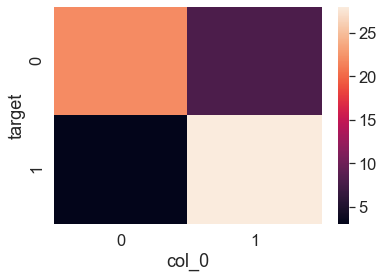

In [14]:
#  Make confusion matrix mjore visible with seaborn
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=pd.crosstab(y_test,
           clf.predict(x_test))
sns.heatmap(conf_mat);

In [15]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(conf_mat,
                  annot=True,
                  cbar=False)
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')

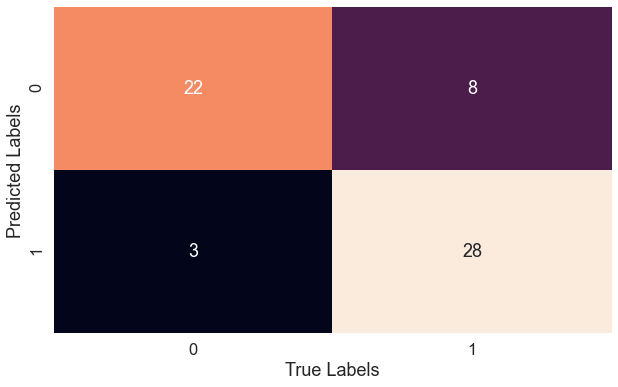

In [16]:
plot_conf_mat(conf_mat)

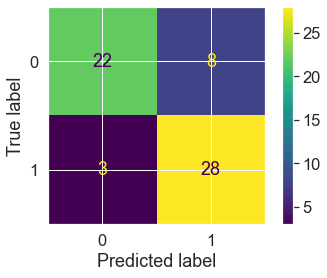

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test);


**Classification Report**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [19]:
#where to use metrics
disease_true=np.zeros(10000)
disease_true[5]=1
disease_predicted=np.zeros(10000)
from sklearn.metrics import accuracy_score
accuracy_score(disease_true,disease_predicted)

0.9999

In [20]:
#look at the report
pd.DataFrame(classification_report(disease_true,disease_predicted,output_dict=True,zero_division=False))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [22]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}